In [2]:
using Bloqade
using PythonCall
using KrylovKit
using SparseArrays

plt = pyimport("matplotlib.pyplot");

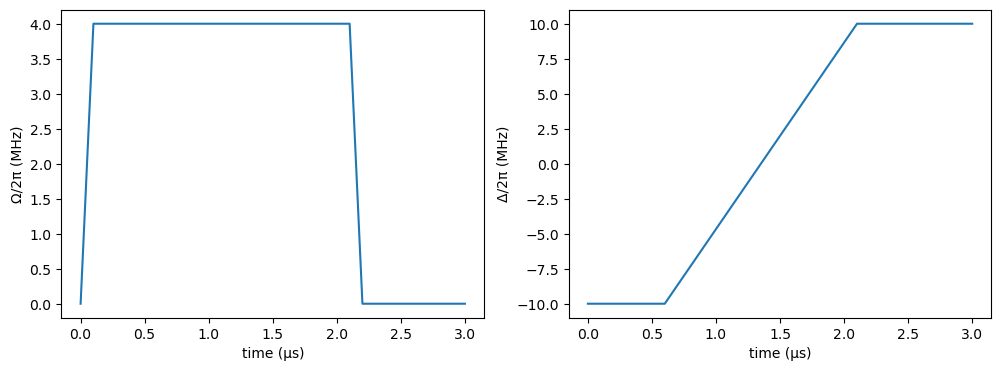

In [2]:
t_tot = 3.0;
Ω_max = 2π * 4;
Ω = piecewise_linear(clocks = [0.0, 0.1, 2.1, 2.2, t_tot], values = [0.0, Ω_max, Ω_max, 0, 0]);
U = 2π * 10; 
Δ = piecewise_linear(clocks = [0.0, 0.6, 2.1, t_tot], values = [-U, -U, U, U]);

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

In [74]:
nsites = 15
atoms = generate_sites(ChainLattice(), nsites, scale = 5.48);
h = rydberg_h(atoms; Δ, Ω);
reg = zero_state(nsites);
prob = SchrodingerProblem(reg, t_tot, h);
integrator = init(prob, Vern8());
densities = []
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:t_tot)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...);

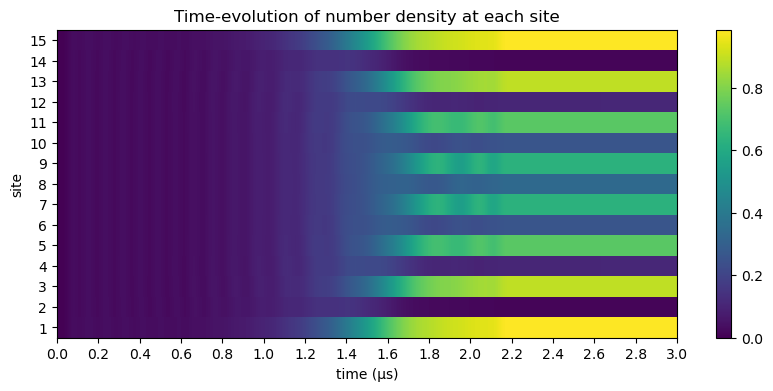

In [75]:
fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, t_tot, 0.5, nsites + 0.5])
ax.set_title("Time-evolution of number density at each site")
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:t_tot)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

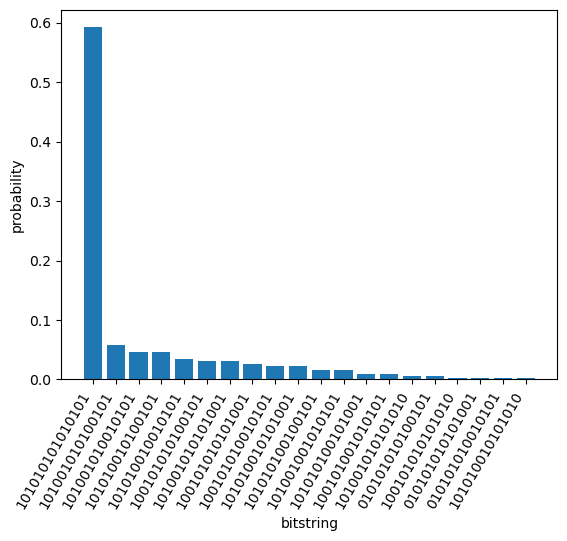

In [76]:
bitstring_hist(reg; nlargest = 20)

In [58]:
C6 = 2π*862690;
Rb = (C6/Ω_max)^(1/6);
a = Rb/sqrt(2);
println("Rb = ", Rb)
println("a = ", a)

Rb = 7.744008044106029
a = 5.475840601550545


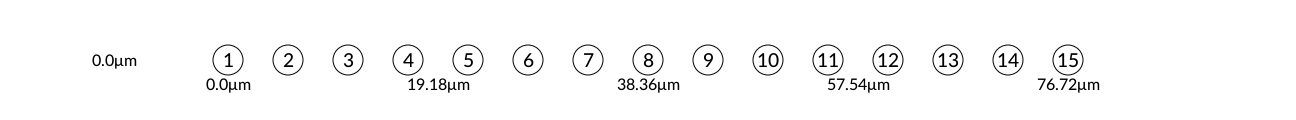

In [77]:
nsites = 15
atoms = generate_sites(ChainLattice(), nsites, scale = 5.48)

In [82]:
Rb/1.4

5.531434317218593

In [92]:
space = blockade_subspace(atoms, 5.5)

15-qubits 1597-elements Subspace{Int64, Vector{Int64}}:
─────┬──────
    1│ 0
    2│ 1
    3│ 2
    ⋮│ ⋮
 1595│ 21842
 1596│ 21844
 1597│ 21845

In [93]:
reg = zero_state(space)

SubspaceArrayReg{2, ComplexF64, Vector{ComplexF64}, Subspace{Int64, Vector{Int64}}}(15, ComplexF64[1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im], Subspace{Int64, Vector{Int64}}(15, Dict(8232 => 629, 1028 => 148, 16464 => 1017, 17417 => 1138, 17554 => 1176, 1090 => 168, 5184 => 543, 20994 => 1456, 10528 => 912, 4136 => 396…), [0, 1, 2, 4, 5, 8, 9, 10, 16, 17  …  21828, 21829, 21832, 21833, 21834, 21840, 21841, 21842, 21844, 21845]))

In [94]:
h = rydberg_h(atoms; Δ, Ω)

nqubits: 15
+
├─ [+] ∑ 2π ⋅ 8.627e6.0/|r_i-r_j|^6 n_i n_j
├─ [+] Ω(t) ⋅ ∑ σ^x_i
└─ [-] Δ(t) ⋅ ∑ n_i


In [95]:
prob = SchrodingerProblem(reg, t_tot, h);
integrator = init(prob, Vern8());

densities = []
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:t_tot)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...);

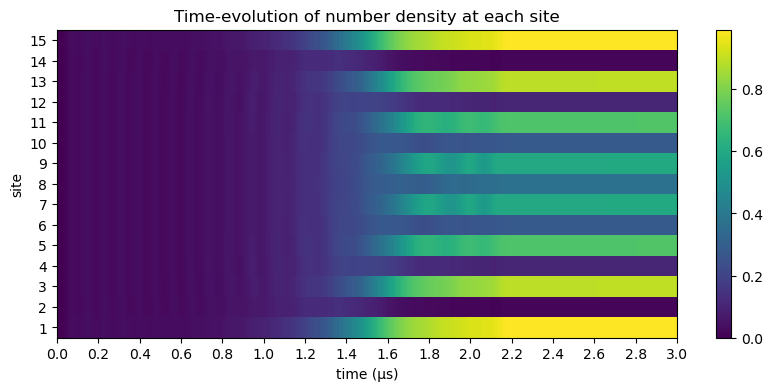

In [96]:
fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, t_tot, 0.5, nsites + 0.5])
ax.set_title("Time-evolution of number density at each site")
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:t_tot)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

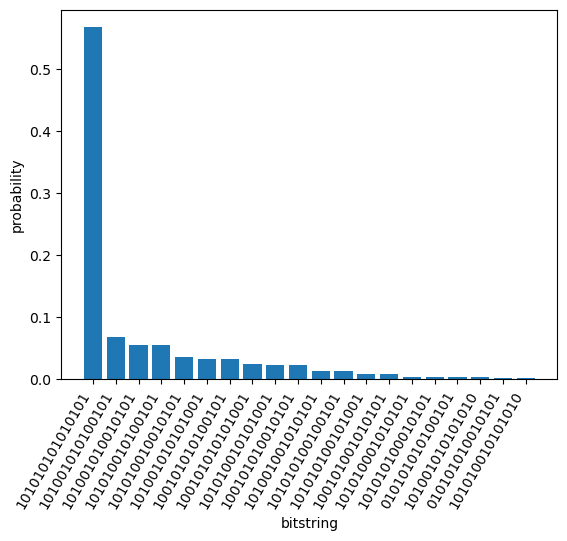

In [97]:
bitstring_hist(prob.reg; nlargest = 20)

In [5]:
nsites = 21
atoms = generate_sites(ChainLattice(), nsites, scale = 5.48);
space = blockade_subspace(atoms, 5.5);
h = rydberg_h(atoms; Δ, Ω);
reg = zero_state(space);
prob = SchrodingerProblem(reg, t_tot, h);
integrator = init(prob, Vern8());
densities = []
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:t_tot)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...);

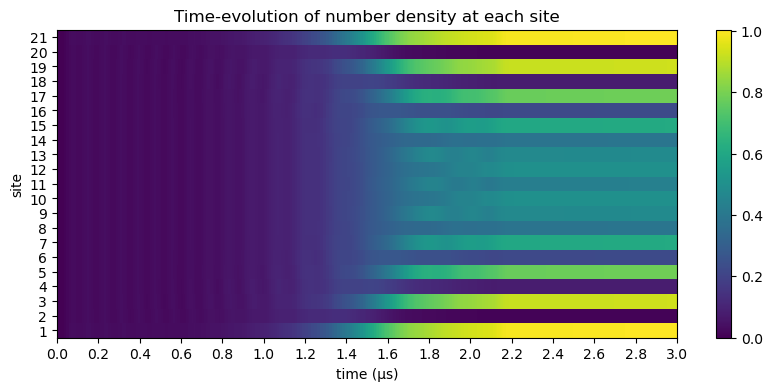

In [6]:
fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, t_tot, 0.5, nsites + 0.5])
ax.set_title("Time-evolution of number density at each site")
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:t_tot)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

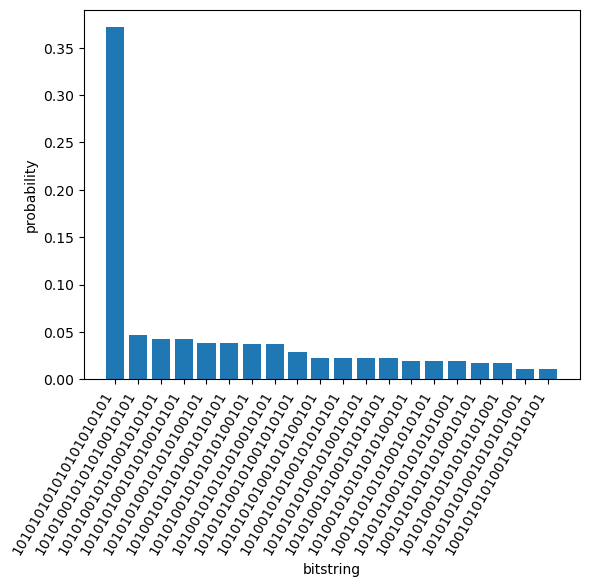

In [7]:
bitstring_hist(prob.reg; nlargest = 20)

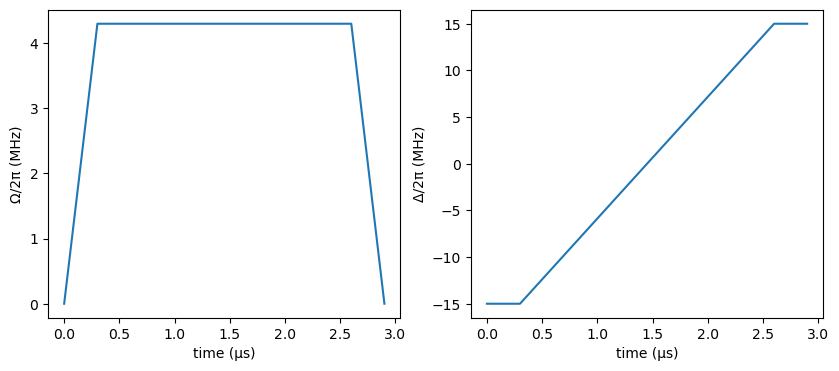

In [3]:
total_time = 2.9
Ω_max = 2π * 4.3
Ω = piecewise_linear(clocks = [0.0, 0.3, 2.6, total_time], values = [0.0, Ω_max, Ω_max, 0]);
U = 2π * 15.0
Δ = piecewise_linear(clocks = [0.0, 0.3, 2.6, total_time], values = [-U, -U, U, U]);

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

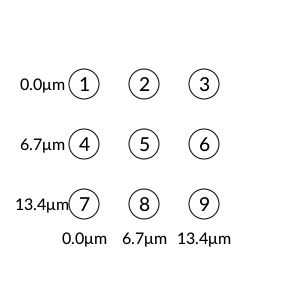

In [4]:
nx, ny = 3, 3
nsites = nx * ny
atoms = generate_sites(SquareLattice(), nx, ny, scale = 6.7)

In [5]:
h = rydberg_h(atoms; Δ, Ω)
reg = zero_state(9);
prob = SchrodingerProblem(reg, total_time, h);
integrator = init(prob, Vern8());

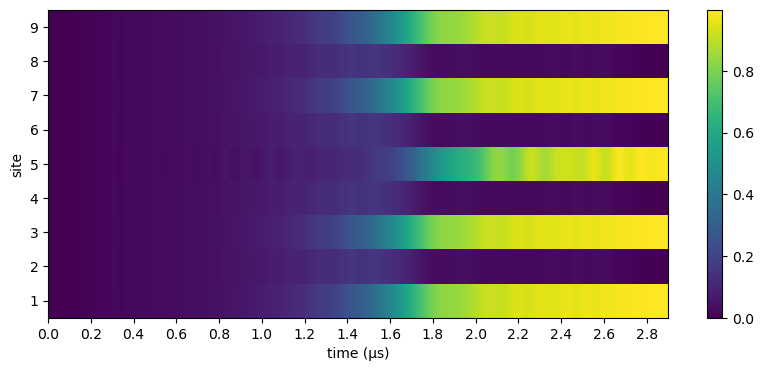

In [6]:
densities = [];
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...)

fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

In [4]:
function den_sq(nx, ny)
    nsites = nx * ny
    atoms = generate_sites(SquareLattice(), nx, ny, scale = 6.7)
    h = rydberg_h(atoms; Δ, Ω)
    reg = zero_state(nsites);
    prob = SchrodingerProblem(reg, total_time, h);
    integrator = init(prob, Vern8());
    densities = [];
    for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
        push!(densities, rydberg_density(reg))
    end
    D = hcat(densities...)
    return D, reg
end

den_sq (generic function with 1 method)

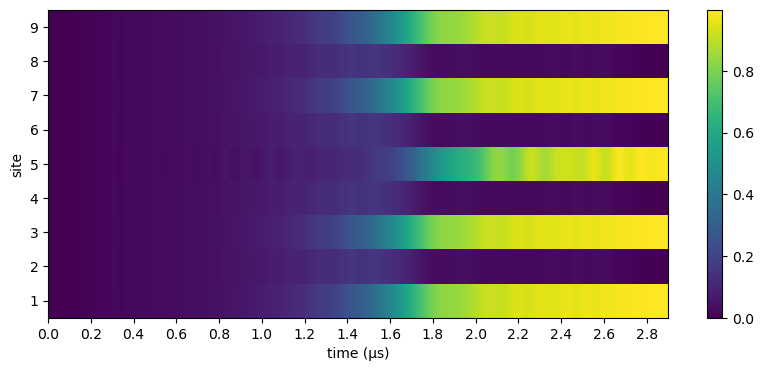

In [13]:
dens, reg = den_sq(4,4);

fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

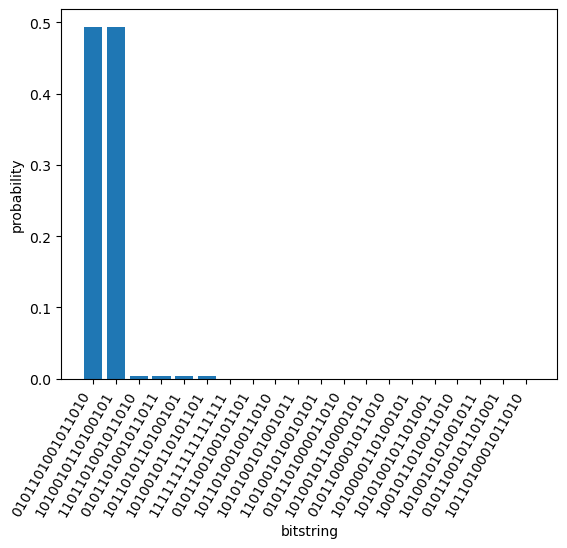

In [14]:
bitstring_hist(reg; nlargest = 20)

In [15]:
measure(reg)[]

1010010110100101 ₍₂₎

In [ ]:
dens, reg = den_sq(5,5);

fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig